In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.defchararray import add
import seaborn as sns

# Loading test set

In [8]:
lensed_data_haris= dict(np.load('../data/injection_pars/haris-et-al/lensed_inj_data.npz'))
unlensed_data_haris= dict(np.load('../data/injection_pars/haris-et-al/unlensed_inj_data.npz'))


In [14]:
df_test=pd.read_csv('/home1/srashti.goyal/strong-lensing-ml-backup-8aug21/data/dataframes/test/ML_combined_kaggle.csv',index_col=0)
df_test.columns

Index(['img_0', 'img_1', 'Lensing', 'bayestar_skymaps_blu',
       'bayestar_skymaps_d2', 'bayestar_skymaps_d3', 'bayestar_skymaps_lsq',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2', 'xgb_pred_bayestar_skymaps',
       'xgb_pred_bayestar_skymaps_1', 'xgb_pred_bayestar_skymaps_2',
       'xgb_pred_bayestar_skymaps_3', 'xgb_pred_bayestar_skymaps_4',
       'xgb_pred_bayestar_skymaps_5', 'xgb_pred_bayestar_skymaps_6',
       'xgb_pred_bayestar_skymaps_7', 'xgb_pred_bayestar_skymaps_8',
       'xgb_pred_bayestar_skymaps_9', 'xgb_pred_bayestar_skymaps_10',
       'xgb_pred_bayestar_skymaps_fpp', 'ra, sin_dec_fpp', 'dense_H1_0',
       'mean_overlap_qts_H1', 'std_overlap_qts_H1', 'lsq_overlap_qts_H1',
       'dense_L1_0', 'mean_overlap_qts_L1', 'std_overlap_qts_L1',
       'lsq_overlap_qts_L1', 'dense_V1_0', 'me

## Skyfeatures statistics

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


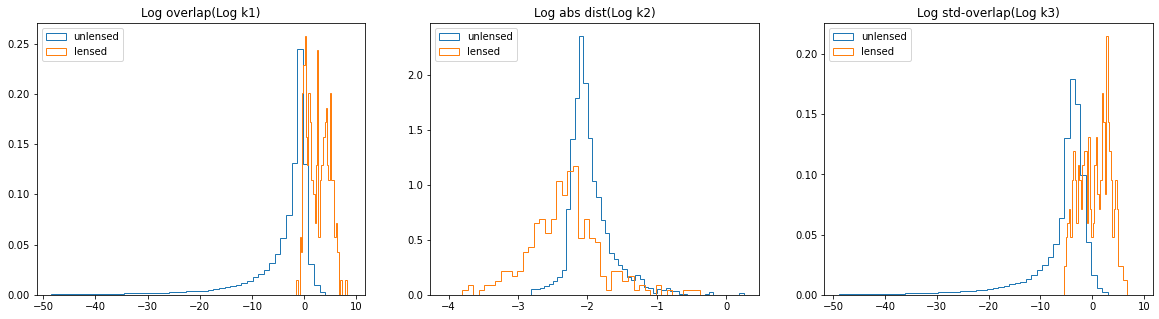

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(131)
stat='bayestar_skymaps_blu'
df=df_test[df_test['Lensing'] == 0]
bins=np.linspace(np.percentile(np.log(df[stat]),1),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='unlensed',density=True)
df=df_test[df_test['Lensing'] == 1]
bins=np.linspace(np.percentile(np.log(df[stat]),0.01),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='lensed',density=True)
plt.legend()
plt.title('Log overlap(Log k1)')
plt.subplot(132)
stat='bayestar_skymaps_lsq'
df=df_test[df_test['Lensing'] == 0]
bins=np.linspace(np.percentile(np.log(df[stat]),1),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='unlensed',density=True)
df=df_test[df_test['Lensing'] == 1]
bins=np.linspace(np.percentile(np.log(df[stat]),0.01),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='lensed',density=True)
plt.legend()
plt.title('Log abs dist(Log k2)')
plt.subplot(133)
stat='bayestar_skymaps_d3'
df=df_test[df_test['Lensing'] == 0]
bins=np.linspace(np.percentile(np.log(df[stat]),1),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='unlensed',density=True)
df=df_test[df_test['Lensing'] == 1]
bins=np.linspace(np.percentile(np.log(df[stat]),0.01),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='lensed',density=True)
plt.legend()
plt.title('Log std-overlap(Log k3)')
plt.show()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


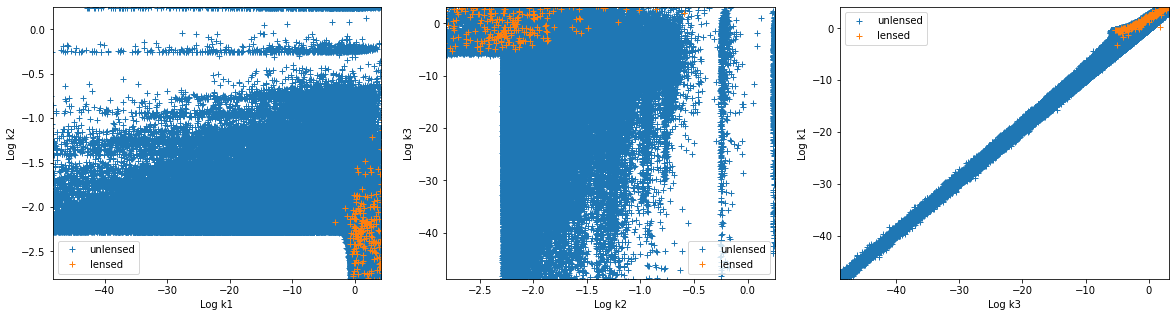

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(131)
stat1='bayestar_skymaps_blu'
stat2='bayestar_skymaps_lsq'
df=df_test[df_test['Lensing'] == 0]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C0',label='unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C1',label='lensed')
plt.xlim(np.percentile(np.log(df_test[stat1]),1),np.percentile(np.log(df_test[stat1]),99.9))
plt.ylim(np.percentile(np.log(df_test[stat2]),1),np.percentile(np.log(df_test[stat2]),99.9))
plt.xlabel('Log k1')
plt.ylabel('Log k2')
plt.legend()
plt.subplot(132)
stat1='bayestar_skymaps_lsq'
stat2='bayestar_skymaps_d3'
df=df_test[df_test['Lensing'] == 0]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C0',label='unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C1',label='lensed')
plt.xlim(np.percentile(np.log(df_test[stat1]),1),np.percentile(np.log(df_test[stat1]),99.9))
plt.ylim(np.percentile(np.log(df_test[stat2]),1),np.percentile(np.log(df_test[stat2]),99.9))
plt.xlabel('Log k2')
plt.ylabel('Log k3')
plt.legend()
plt.subplot(133)
stat1='bayestar_skymaps_d3'
stat2='bayestar_skymaps_blu'
df=df_test[df_test['Lensing'] == 0]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C0',label='unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C1',label='lensed')
plt.xlim(np.percentile(np.log(df_test[stat1]),1),np.percentile(np.log(df_test[stat1]),99.9))
plt.ylim(np.percentile(np.log(df_test[stat2]),1),np.percentile(np.log(df_test[stat2]),99.9))
plt.xlabel('Log k3')
plt.ylabel('Log k1')
plt.legend()
plt.show()

## BLU and ML FPPs comparison for test set

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


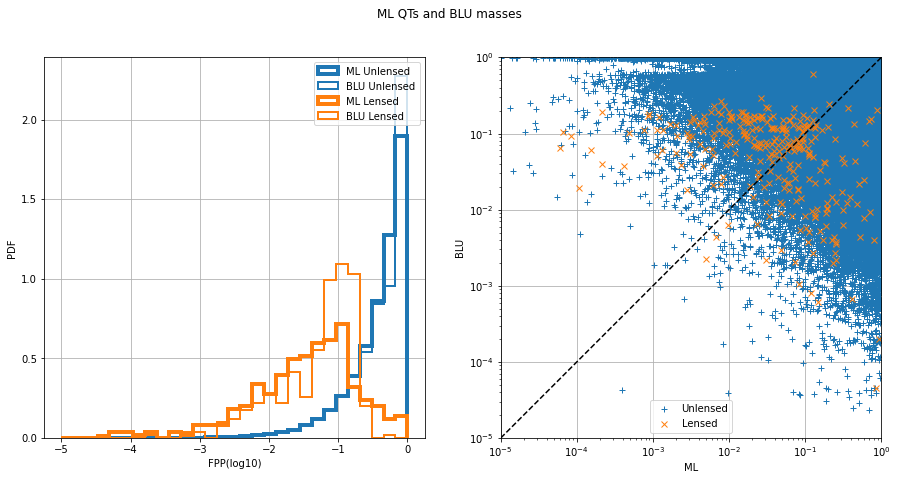

In [17]:
blu_stat='m1, m2'
ml_stat='xgb_dense_QTS_0'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.loglog(10**bins,10**bins,'k--')
plt.legend()
plt.xlabel('ML')
plt.ylabel('BLU')
plt.grid()
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.suptitle('ML QTs and BLU masses')
plt.show()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


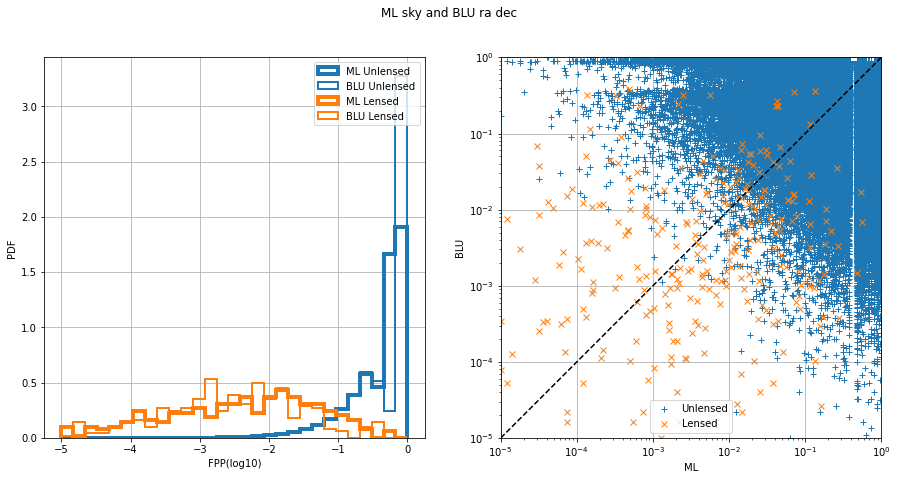

In [18]:
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.legend()
plt.loglog(10**bins,10**bins,'k--')
plt.xlabel('ML')
plt.ylabel('BLU')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)

plt.grid()
plt.suptitle('ML sky and BLU ra dec')

plt.show()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


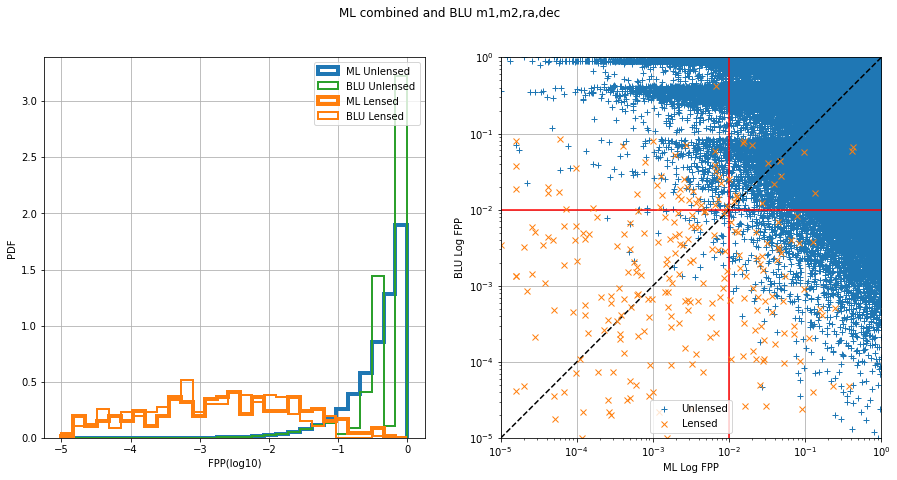

In [19]:
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C2',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
plt.axvline(1e-2,color='r')
plt.axhline(1e-2,color='r')

plt.loglog(10**bins,10**bins,'k--')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.legend()
plt.xlabel('ML Log FPP')
plt.ylabel('BLU Log FPP')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.grid()
plt.suptitle('ML combined and BLU m1,m2,ra,dec')

plt.show()

## Elimination and identification by BLU and ML

In [20]:
df=df_test[df_test['Lensing'] == 0]
common_ul_frac=len(df[(df[ml_stat+'_fpp']>1e-2) & (df[blu_stat+'_fpp']>1e-2)])/len(df)
print(' common unlensed fraction i.e. weed out by ML & BLU: %.3f'%common_ul_frac)

df=df_test[df_test['Lensing'] == 1]
common_l_frac_sel=len(df[(df[ml_stat+'_fpp']<1e-2) & (df[blu_stat+'_fpp']<1e-2)])/len(df)
print(' common lensed fraction i.e. identified by ML & BLU: %.3f'%common_l_frac_sel)

df=df_test[df_test['Lensing'] == 1]
common_l_frac=len(df[(df[ml_stat+'_fpp']>1e-2) & (df[blu_stat+'_fpp']>1e-2)])/len(df)
print(' common lensed fraction i.e. weed out by ML & BLU: %.3f'%common_l_frac)

df=df_test[df_test['Lensing'] == 1]
common_l_frac=len(df[(df[ml_stat+'_fpp']<1e-2) & (df[blu_stat+'_fpp']>1e-2)])/len(df)
print(' lensed fraction i.e. weed out by BLU but identified by ML: %.3f'%common_l_frac)

df=df_test[df_test['Lensing'] == 1]
common_l_frac=len(df[(df[ml_stat+'_fpp']>1e-2) & (df[blu_stat+'_fpp']<1e-2)])/len(df)
print(' lensed fraction i.e. weed out by ML but identified by BLU: %.3f'%common_l_frac)

 common unlensed fraction i.e. weed out by ML & BLU: 0.980
 common lensed fraction i.e. identified by ML & BLU: 0.572
 common lensed fraction i.e. weed out by ML & BLU: 0.055
 lensed fraction i.e. weed out by BLU but identified by ML: 0.147
 lensed fraction i.e. weed out by ML but identified by BLU: 0.226


## Investigating high FPP lensed events as classified by ML and BLU

In [21]:
df_lensed=df_test[df_test['Lensing'] == 1]


In [22]:
tags=df_lensed['img_0'].str.rsplit('_',1).values


In [23]:
ids=[]
event_tags=[]
for event in tags:
    event_tag=event[0]
    idx=np.where(event_tag==lensed_data_haris['event_tag'])[0][0]
    ids.append(idx),event_tags.append(event_tag)
df_lensed['inj_id']=ids
df_lensed['event_tag'] = event_tags
df_lensed.tail()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,densnet_xgbsky_bayestar_mul_5,densnet_xgbsky_bayestar_mul_6,densnet_xgbsky_bayestar_mul_7,densnet_xgbsky_bayestar_mul_8,densnet_xgbsky_bayestar_mul_9,densnet_xgbsky_bayestar_mul_10,densnet_xgbsky_bayestar_mul_0_fpp,"m1, m2, ra, sin_dec_fpp",inj_id,event_tag
488687,6_776_922792012.262599229-1,6_776_922776093.028576493-2,1,1.463252,0.011798,0.169570,0.210909,2.224779,6.997735,0.321742,...,7.326459e-08,2.565130e-07,7.027256e-08,7.022883e-08,1.483409e-07,2.168404e-08,0.408404,0.059712,42,6_776
491785,1_3705_799513513.058334946-1,1_3705_799513179.459235787-2,1,1.136169,0.009161,0.071357,0.102656,674.765375,1329.098388,9.622317,...,1.252604e-04,1.446614e-04,1.683169e-04,1.596341e-04,1.228052e-04,2.454900e-04,0.013626,0.002549,5,1_3705
493900,4_2927_925062023.766241908-1,4_2927_925061580.558222651-2,1,49.288039,0.397404,7.908766,0.103262,55052.012344,68790.270845,575.512712,...,8.481221e-02,8.710976e-02,6.889510e-02,7.093507e-02,6.841390e-02,1.026751e-01,0.000068,0.000040,253,4_2927
494225,7_14252_840356197.120135545-1,7_14252_840356196.097228527-2,1,47.956584,0.386668,10.588196,0.118123,301114.258237,167512.998738,281.475333,...,1.986768e-02,4.001265e-02,2.978803e-02,2.467714e-02,2.892454e-02,5.345440e-02,0.000126,0.000008,66,7_14252
494383,4_85_831706154.318115353-1,4_85_831670545.782117366-2,1,24.699994,0.199153,6.638030,0.090036,27412.931462,27183.774790,50.924077,...,6.359293e-07,5.766389e-07,5.191740e-07,8.359793e-08,5.333945e-07,5.614538e-07,0.232509,0.000048,118,4_85


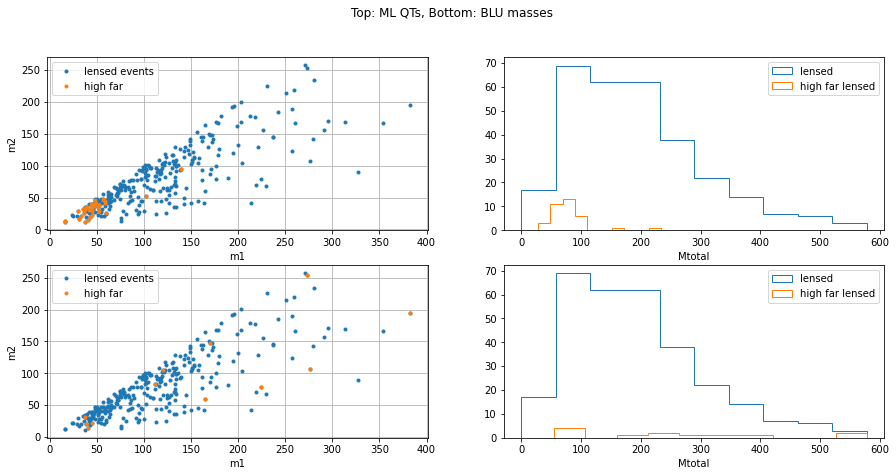

In [24]:
plt.figure(figsize=(15,7))
ml_stat='xgb_dense_QTS_0'
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>2e-1].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(221)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(222)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()

blu_stat='m1, m2'
df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>2e-1].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(223)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()
plt.suptitle('Top: ML QTs, Bottom: BLU masses')
plt.show()

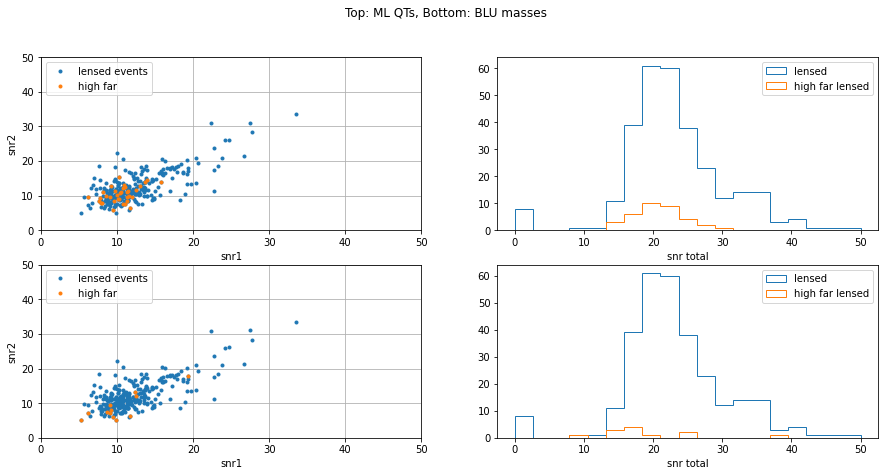

In [25]:
plt.figure(figsize=(15,7))
ml_stat='xgb_dense_QTS_0'
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>2e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]
bins=np.linspace(0,50,20)
plt.subplot(221)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.legend()
plt.grid()
plt.xlim(0,50)
plt.ylim(0,50)
plt.subplot(222)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,density=False,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,density=False,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()

blu_stat='m1, m2'
df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>2e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]

plt.subplot(223)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,density=False,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,density=False,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()
plt.suptitle('Top: ML QTs, Bottom: BLU masses')
plt.show()

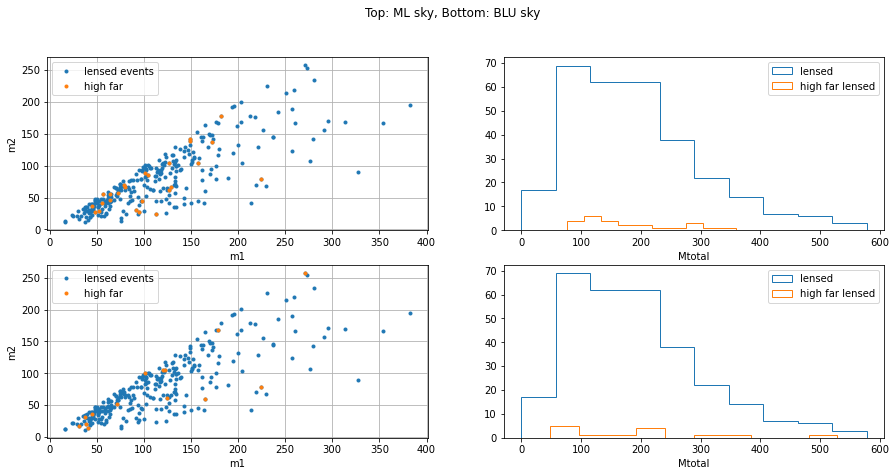

In [26]:
plt.figure(figsize=(15,7))
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'

df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-1].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(221)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(222)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()

df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>1e-1].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(223)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()
plt.suptitle('Top: ML sky, Bottom: BLU sky')
plt.show()

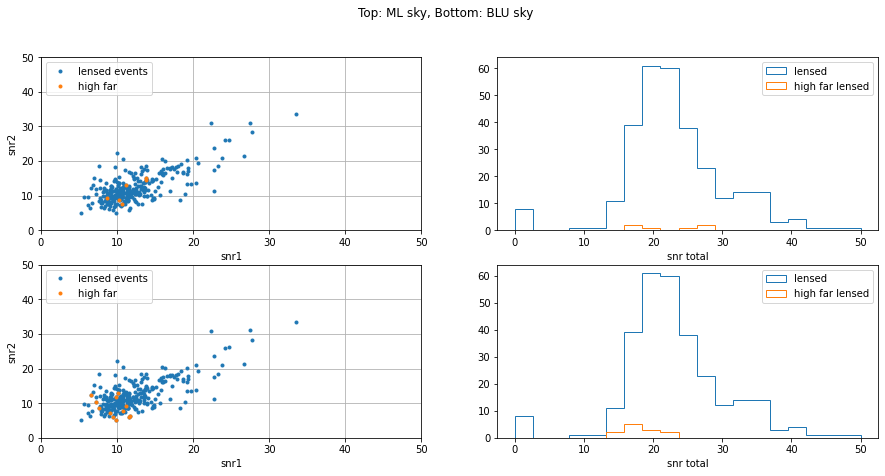

In [27]:
plt.figure(figsize=(15,7))
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'

df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>2e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]
bins=np.linspace(0,50,20)
plt.subplot(221)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.legend()
plt.grid()
plt.xlim(0,50)
plt.ylim(0,50)
plt.subplot(222)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()

df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>2e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]

plt.subplot(223)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()
plt.suptitle('Top: ML sky, Bottom: BLU sky')
plt.show()

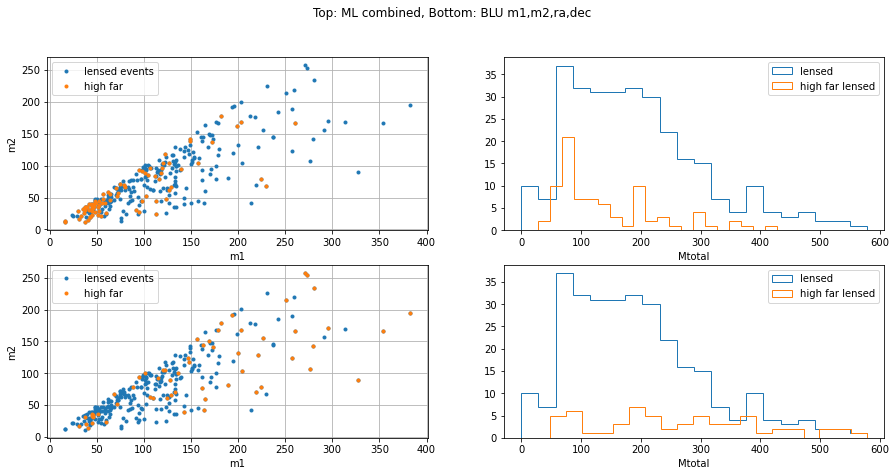

In [28]:
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'

plt.figure(figsize=(15,7))
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-2].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]
bs=20
plt.subplot(221)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(222)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],bs,density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,bs,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()

df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>1e-2].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(223)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],bs,density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,bs,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()
plt.suptitle('Top: ML combined, Bottom: BLU m1,m2,ra,dec')
plt.show()

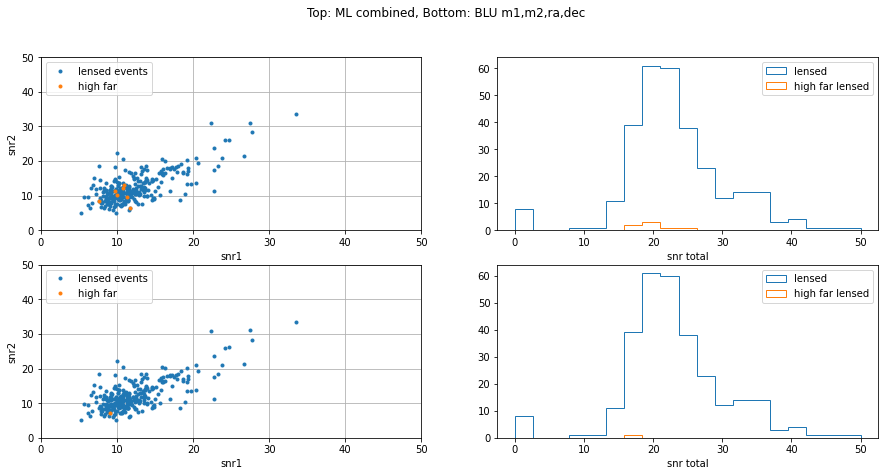

In [29]:
plt.figure(figsize=(15,7))
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'


df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>2e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]
bins=np.linspace(0,50,20)
plt.subplot(221)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.legend()
plt.grid()
plt.xlim(0,50)
plt.ylim(0,50)
plt.subplot(222)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()

df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>2e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]

plt.subplot(223)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()
plt.suptitle('Top: ML combined, Bottom: BLU m1,m2,ra,dec')
plt.show()

In [30]:
ml_stat='xgb_dense_QTS_0'
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>2e-1].reset_index()
df_lensed_high_far['event_tag'].values

array(['4_489', '11_2586', '9_1317', '1_465', '7_1', '4_458', '6_42',
       '9_0', '8_529', '8_2956', '10_1887', '11_1242', '7_0', '8_62',
       '9_7347', '5_4766', '10_8779', '1_23', '8_2974', '6_1278',
       '5_1136', '4_270', '7_2286', '9_201', '9_317', '6_222', '10_599',
       '10_226', '1_493', '6_5368', '4_7346', '11_453', '4_1653', '6_776',
       '4_85'], dtype=object)

In [31]:
#https://www.kaggle.com/srashtigoyal/dnn-skymaps-sklearn-with-prob-distance-metrics

## Check Bayestar skymaps and QTs of events with very different BLU v/s ML FPPs

In [34]:
ml_stat='xgb_dense_QTS_0'
blu_stat = 'm1, m2'
blu_low_fpp=(df_lensed[ml_stat+'_fpp']>1e-2) & (df_lensed[blu_stat+'_fpp']<1e-4)
ml_low_fpp=(df_lensed[ml_stat+'_fpp']<1e-4) & (df_lensed[blu_stat+'_fpp']>1e-2)


In [36]:
df_lensed[blu_low_fpp]

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,densnet_xgbsky_bayestar_mul_5,densnet_xgbsky_bayestar_mul_6,densnet_xgbsky_bayestar_mul_7,densnet_xgbsky_bayestar_mul_8,densnet_xgbsky_bayestar_mul_9,densnet_xgbsky_bayestar_mul_10,densnet_xgbsky_bayestar_mul_0_fpp,"m1, m2, ra, sin_dec_fpp",inj_id,event_tag
180416,9_0_907584501.910408258-2,9_0_907570447.420640707-0,1,53.639404,0.432488,24.910175,0.19582,1.988106e+07,5.615212e+06,430.525972,...,4.633333e-08,3.256459e-08,4.257154e-08,5.693996e-08,3.491039e-08,9.998854e-08,0.322915,0.0,272,9_0


In [37]:
df_lensed[ml_low_fpp]

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,densnet_xgbsky_bayestar_mul_5,densnet_xgbsky_bayestar_mul_6,densnet_xgbsky_bayestar_mul_7,densnet_xgbsky_bayestar_mul_8,densnet_xgbsky_bayestar_mul_9,densnet_xgbsky_bayestar_mul_10,densnet_xgbsky_bayestar_mul_0_fpp,"m1, m2, ra, sin_dec_fpp",inj_id,event_tag
88956,6_3312_826624289.770947098-1,6_3312_826624280.993500232-2,1,131.828474,1.062918,23.666566,0.079897,2392.691885,3561.151806,105.470213,...,0.769030,0.733661,0.698236,0.688841,0.737386,0.637021,0.000000,0.000703,44,6_3312
109833,3_544_544363847.739058256-1,3_544_544347882.797658801-2,1,22.178672,0.178824,5.957423,0.136141,93048.249029,57439.137705,334.531050,...,0.004085,0.002238,0.003299,0.002922,0.002171,0.002616,0.001722,0.000092,270,3_544
148622,11_1126_967423114.080046534-2,11_1126_966656132.839426636-0,1,14.855625,0.119779,1.259009,0.297485,153.026133,300.349577,6.931368,...,0.001051,0.000706,0.001303,0.000930,0.000782,0.001133,0.003303,0.008637,234,11_1126
174262,6_18662_828446511.984032154-1,6_18662_828446424.003375530-2,1,224.258277,1.808168,52.426300,0.238822,557.710471,5737.417332,75.734767,...,0.040872,0.016691,0.042726,0.042315,0.025094,0.031515,0.000210,0.000703,149,6_18662


In [137]:
data_dir_qt = '/home1/srashti.goyal/strong-lensing-ml-backup-8aug21/data/qts/test/'

In [138]:

def load_qts(data_dir,tag):
    plt.figure(figsize=(20,10))
    plt.subplot(131)
    det='H1'
    fname = data_dir + det + '/' + tag + '.png'
    img_0=plt.imread(fname)
    plt.imshow(img_0)
    plt.title(tag + '  ' + det)
    plt.subplot(132)
    det='L1'
    fname = data_dir + det + '/' + tag + '.png'
    img_0=plt.imread(fname)
    plt.imshow(img_0)
    plt.title(tag + '  ' + det)

    plt.subplot(133)
    det='V1'
    fname = data_dir + det + '/' + tag+ '.png'
    img_0=plt.imread(fname)
    
    plt.imshow(img_0)
    plt.title(tag + '  ' + det)

    plt.show()

44.9848292803 29.468971577


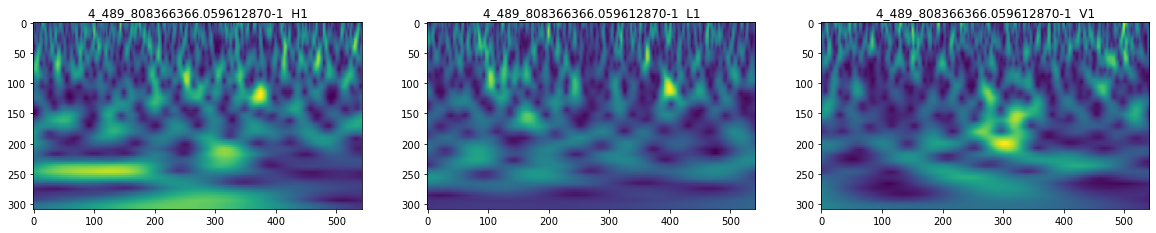

In [151]:
index=0
df=df_lensed[blu_low_fpp]
tag_0=df['img_0'].values[index]
tag_1=df['img_1'].values[index]
print(lensed_data_haris['m1'][df['inj_id'].values[index]],lensed_data_haris['m2'][df['inj_id'].values[index]])
load_qts(data_dir=data_dir_qt,tag=tag_0)

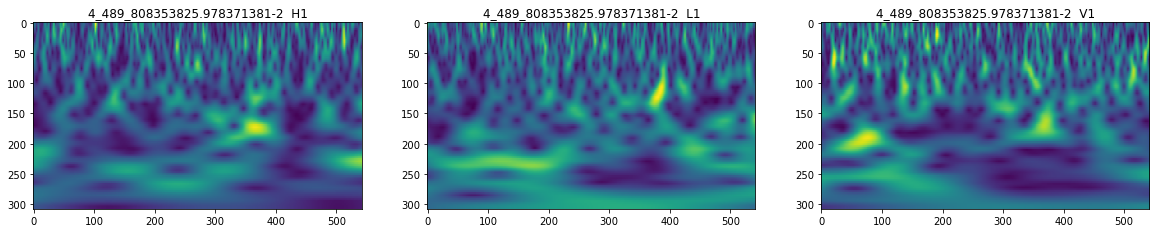

In [152]:
load_qts(data_dir=data_dir_qt,tag=tag_1)

47.787751061 46.801120661


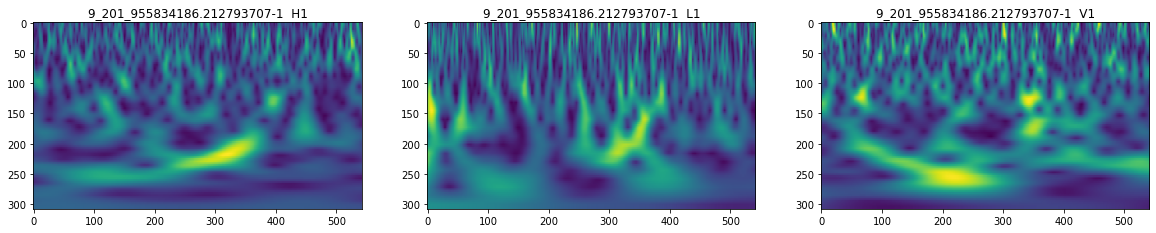

In [159]:
index=4
df=df_lensed[ml_low_fpp]

tag_0=df['img_0'].values[index]
tag_1=df['img_1'].values[index]
print(lensed_data_haris['m1'][df['inj_id'].values[index]],lensed_data_haris['m2'][df['inj_id'].values[index]])

load_qts(data_dir=data_dir_qt,tag=tag_0)

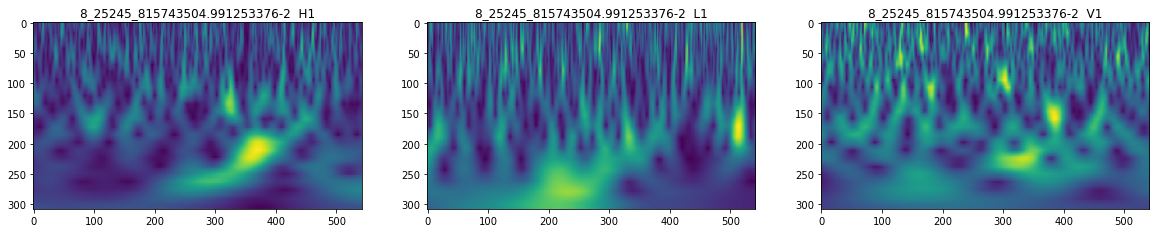

In [156]:
load_qts(data_dir=data_dir_qt,tag=tag_1)

In [160]:
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'
blu_low_fpp=(df_lensed[ml_stat+'_fpp']>1e-2) & (df_lensed[blu_stat+'_fpp']<1e-4)
ml_low_fpp=(df_lensed[ml_stat+'_fpp']<1e-4) & (df_lensed[blu_stat+'_fpp']>1e-2)


In [161]:
df_lensed[blu_low_fpp]

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,densnet_xgbsky_bayestar_mul_5,densnet_xgbsky_bayestar_mul_6,densnet_xgbsky_bayestar_mul_7,densnet_xgbsky_bayestar_mul_8,densnet_xgbsky_bayestar_mul_9,densnet_xgbsky_bayestar_mul_10,densnet_xgbsky_bayestar_mul_0_fpp,"m1, m2, ra, sin_dec_fpp",inj_id,event_tag
84366,4_489_808366366.059612870-1,4_489_808353825.978371381-2,1,0.819742,0.006609,0.008256,0.049027,3.119208e+06,5.957636e+05,383.868861,...,6.190930e-06,5.057220e-06,6.189025e-06,7.408384e-06,9.203492e-06,1.316242e-05,0.051964,0.000004,77,4_489
109833,3_544_544363847.739058256-1,3_544_544347882.797658801-2,1,22.178672,0.178824,5.957423,0.136141,9.304825e+04,5.743914e+04,334.531050,...,4.085034e-03,2.238394e-03,3.298543e-03,2.921899e-03,2.171214e-03,2.616329e-03,0.001722,0.000092,270,3_544
180416,9_0_907584501.910408258-2,9_0_907570447.420640707-0,1,53.639404,0.432488,24.910175,0.195820,1.988106e+07,5.615212e+06,430.525972,...,4.633333e-08,3.256459e-08,4.257154e-08,5.693996e-08,3.491039e-08,9.998854e-08,0.322915,0.000000,272,9_0
263323,8_62_980340398.820162415-1,8_62_980339723.505194902-2,1,9.149068,0.073768,1.994269,0.100844,2.161387e+08,4.296657e+07,2611.823462,...,4.904930e-06,3.121188e-06,1.240601e-06,2.020781e-06,1.883841e-06,2.166879e-06,0.105347,0.000000,205,8_62
380011,11_1016_624394000.582134723-1,11_1016_624393966.373340368-2,1,38.304256,0.308843,15.334536,0.089946,4.850471e+06,3.270899e+05,532.256478,...,6.329659e-03,3.266782e-03,5.044907e-03,4.896521e-03,4.663218e-03,1.702999e-03,0.001530,0.000010,22,11_1016
432486,6_1013_575119331.208349347-1,6_1013_575117637.739794254-2,1,0.588741,0.004747,0.011467,0.079860,4.192101e+08,2.385617e+06,564.267457,...,2.610424e-05,3.345780e-05,2.923287e-05,1.854060e-05,3.474241e-05,1.686628e-05,0.036054,0.000002,269,6_1013
476958,11_330_907968233.117979645-1,11_330_907967795.451250314-2,1,13.936695,0.112370,2.559471,0.154577,1.278437e+06,1.172562e+06,575.325296,...,1.587269e-04,4.074877e-05,3.642727e-05,4.617238e-05,2.677908e-05,6.985605e-05,0.022639,0.000002,187,11_330


In [162]:
df_lensed[ml_low_fpp]

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,densnet_xgbsky_bayestar_mul_5,densnet_xgbsky_bayestar_mul_6,densnet_xgbsky_bayestar_mul_7,densnet_xgbsky_bayestar_mul_8,densnet_xgbsky_bayestar_mul_9,densnet_xgbsky_bayestar_mul_10,densnet_xgbsky_bayestar_mul_0_fpp,"m1, m2, ra, sin_dec_fpp",inj_id,event_tag
57929,9_1203_721052364.946182370-1,9_1203_721039402.579273223-2,1,350.381790,2.825088,117.538788,0.139714,75.185471,124.797316,11.885252,...,0.488825,0.388271,0.403338,0.388872,0.311741,0.383745,0.000000,0.010557,99,9_1203
184454,8_25245_815743505.159950137-1,8_25245_815743504.991253376-2,1,99.024413,0.798422,10.736553,0.134599,53.035743,82.959822,4.293717,...,0.438339,0.508725,0.505123,0.364285,0.453873,0.572291,0.000000,0.018687,231,8_25245
322571,1_1674_880899223.854309916-1,1_1674_880896130.203195333-2,1,153.733393,1.239534,27.500180,0.149241,984.155917,731.219375,3.207879,...,0.071365,0.116922,0.089407,0.062731,0.055704,0.057784,0.000100,0.002112,145,1_1674
347967,6_12967_770632161.276382327-1,6_12967_770628032.365889906-2,1,9.665727,0.077934,0.516567,0.049443,912.759929,286.503814,9.849203,...,0.484033,0.440842,0.345880,0.454057,0.510672,0.584073,0.000000,0.009073,81,6_12967
366028,9_201_955834186.212793707-1,9_201_955832471.876044988-2,1,329.069044,2.653245,26.364229,0.246812,1097.409158,658.297835,8.219674,...,0.002156,0.003027,0.000909,0.001763,0.000657,0.001653,0.002274,0.003497,201,9_201
416014,1_22141_963334191.420760154-1,1_22141_963334191.227844834-2,1,11.541266,0.093056,0.675928,0.031551,22.068427,34.031511,1.533836,...,0.387336,0.512076,0.418537,0.389380,0.392515,0.381410,0.000000,0.034843,3,1_22141
428772,9_14299_651971048.385062694-1,9_14299_651970895.543521165-2,1,14.477781,0.116733,1.311089,0.035486,43.672442,111.294673,6.711138,...,0.333152,0.299723,0.497560,0.309246,0.358518,0.537305,0.000002,0.010787,40,9_14299


In [163]:
data_dir = '/home1/srashti.goyal/strong-lensing-ml-backup-8aug21/data/bayestar_skymaps/test/'
data_dir_pe = '/home1/srashti.goyal/bayestar_test/Haris_CIT_injs_PE/Data_to_Kaggle/PE_skymaps/Lensed/'

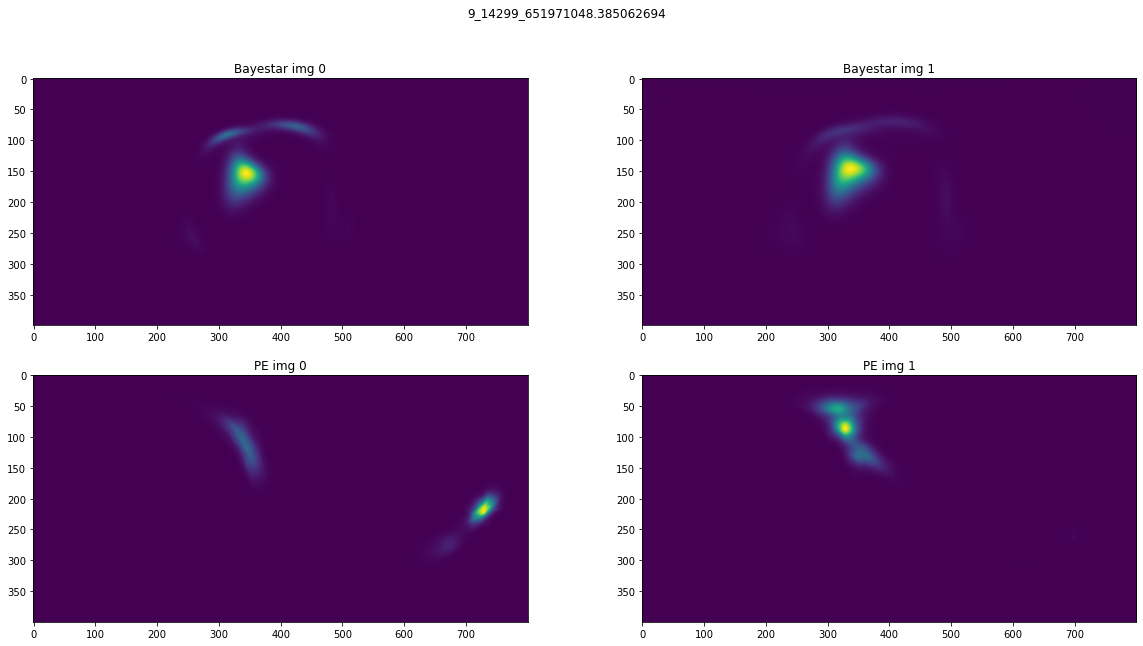

In [172]:
index=6
df=df_lensed[ml_low_fpp]
#df=df_lensed[blu_low_fpp]

tag_0=df['img_0'].values[index]
tag_1=df['img_1'].values[index]
fname=data_dir + tag_0 + '.npz'
plt.figure(figsize=(20,10))
plt.subplot(221)
img_0=np.load(fname)['data']
plt.imshow(img_0)
plt.title('Bayestar img 0')
plt.subplot(222)
fname=data_dir + tag_1 + '.npz'
img_1=np.load(fname)['data']
plt.imshow(img_1)
plt.title('Bayestar img 1')

plt.subplot(223)
fname=data_dir_pe + tag_0 + '.npz'
img_0=np.load(fname)['data']
plt.imshow(np.roll(img_0,400,axis=1))
plt.title('PE img 0')

plt.subplot(224)
fname=data_dir_pe + tag_1 + '.npz'
img_1=np.load(fname)['data']
plt.imshow(np.roll(img_1,400,axis=1))
plt.title('PE img 1')
plt.suptitle(tag_0[:-2])
plt.show()